# Setup

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import cv2

In [2]:
#path dove si trova il dataframe hmdb51
path = "./data/hmdb51"

# Esplorazione: i video

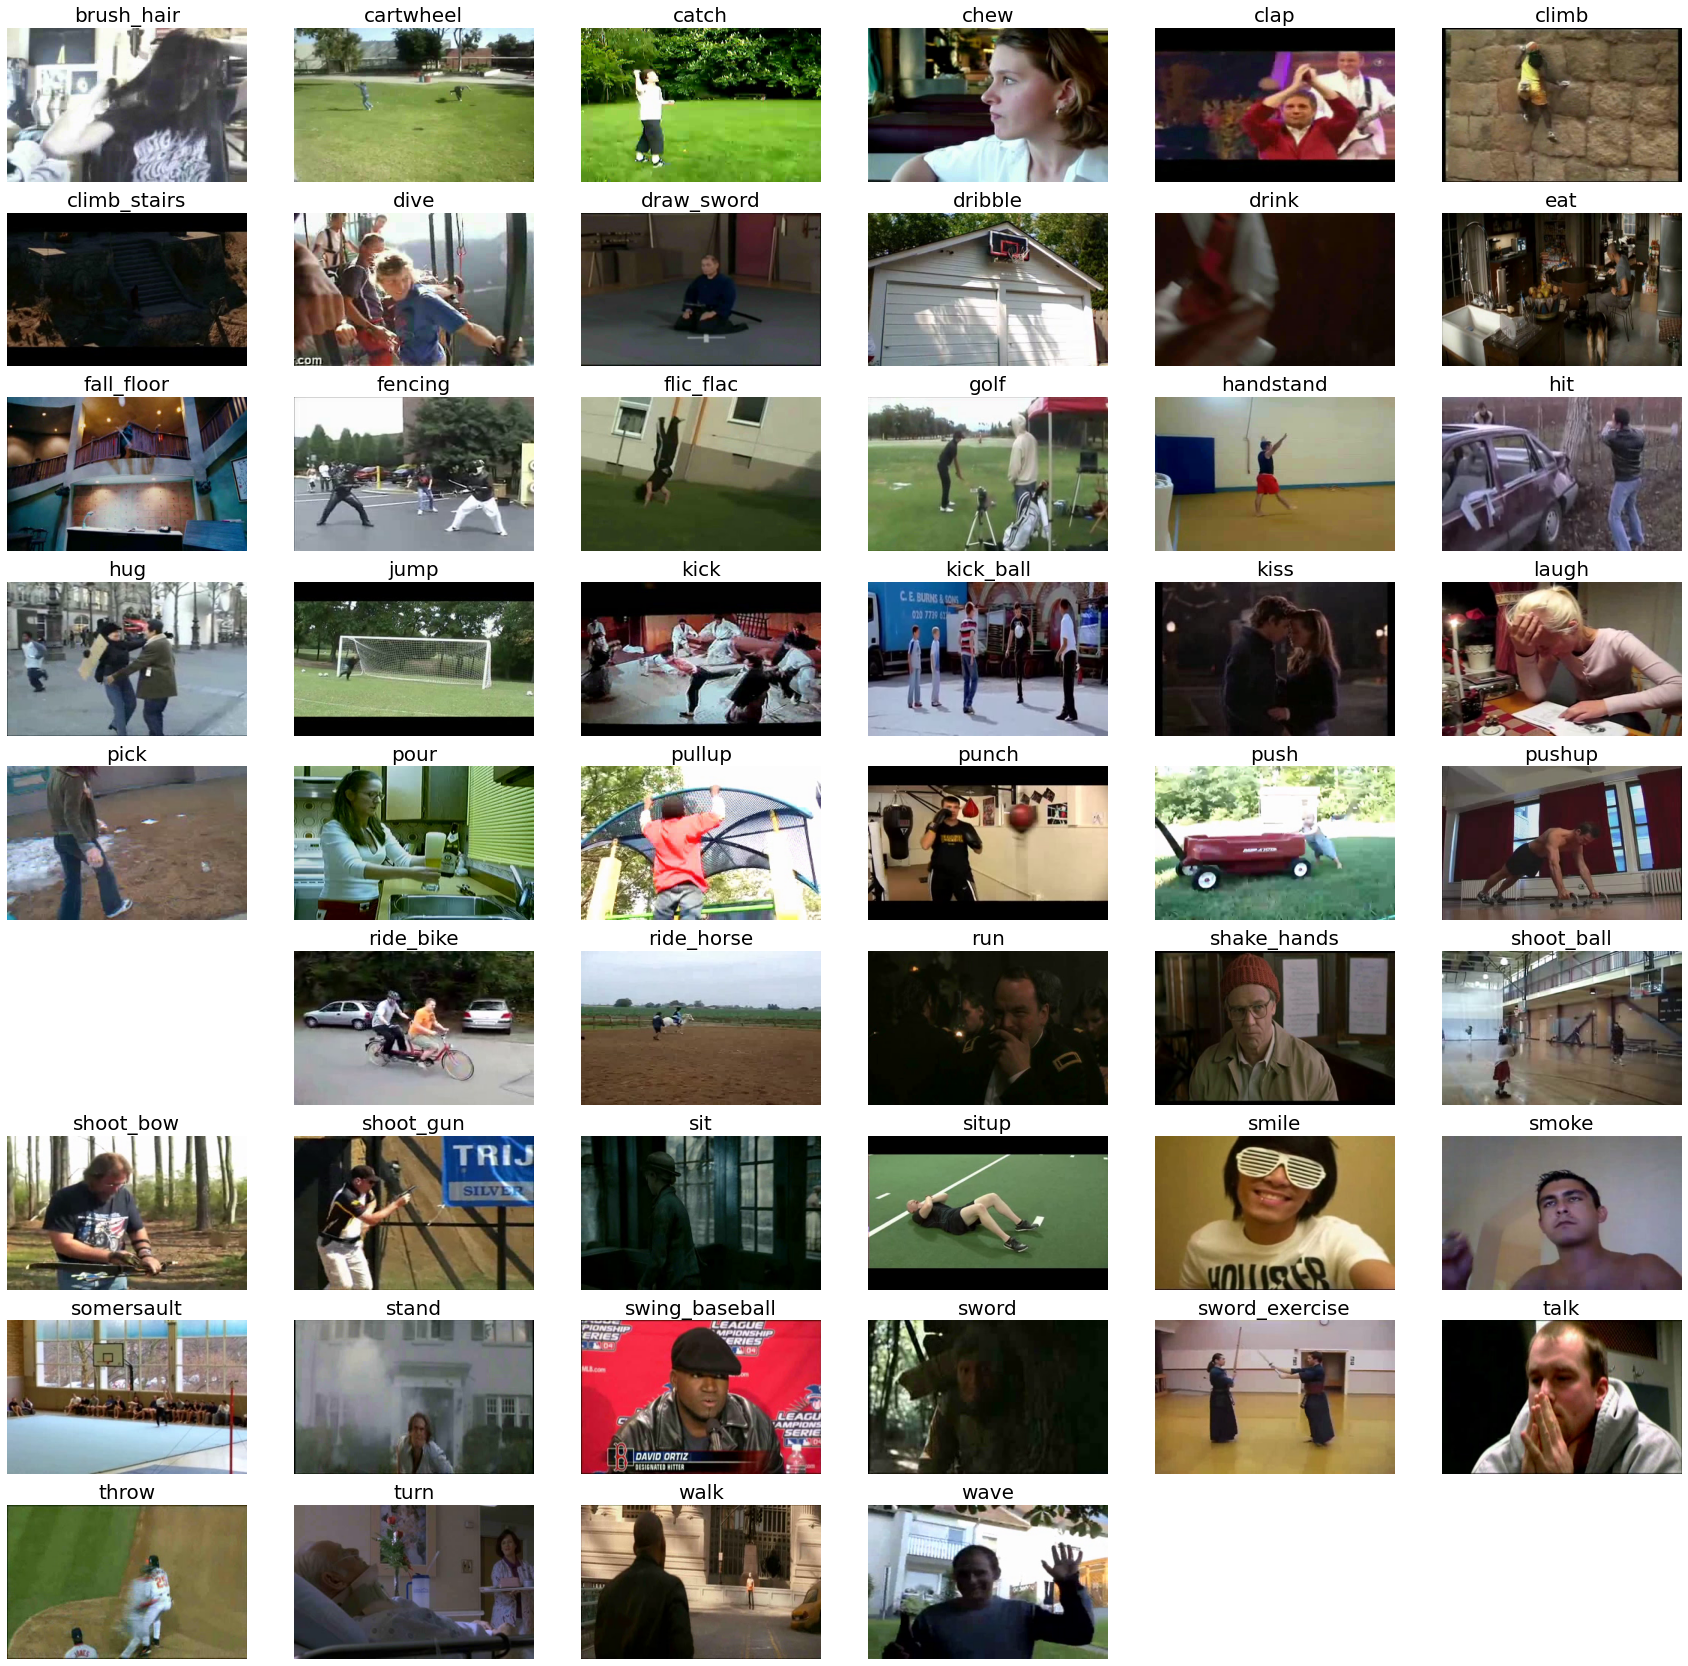

In [3]:
plt.figure(figsize=(30,30))
actions = os.listdir(f"{path}/videos")    #va estratto il dataset dal file zippato
counter = 0
for action in actions:
    counter += 1
    list_videos_action = os.listdir(f"{path}/videos/{action}")    #tutti i video di quell'azione
    if (action != "video") and (action != "rawframes"):
        selected_video = random.choice(list_videos_action)
        video_reader = cv2.VideoCapture(f"{path}/videos/{action}/{selected_video}")
        ret, gbrframe = video_reader.read()
        video_reader.release()
        rgb_frame = cv2.cvtColor(gbrframe, cv2.COLOR_BGR2RGB)    #converto immagine da BGR a RGB
        plt.subplot(9,6,counter);plt.imshow(rgb_frame, aspect = "auto");plt.axis("off")
        plt.title(action, fontsize = 20)

##### Creo dataframes contenenti le informazioni di quali video usare come training/test

In [6]:
def split_to_df(split):
    df = pd.DataFrame(columns=['action', 'title', 'train/test'])
    for action in actions:
        if (action != "video") and (action != "rawframes"):  
            with open(f"{path}/testTrainMulti_7030_splits/{action}_test_{split}.txt") as f:
                informations = f.readlines()       
            for info in informations:   #per ogni video della lista dei video di una data azione
                df.loc[len(df)] = action, info.split()[0], int(info.split()[1])
    return df

In [7]:
split1 = split_to_df("split1")
split2 = split_to_df("split2")
split3 = split_to_df("split3")

In [ ]:
split1.head(10)

,action,title,train/test
0,brush_hair,April_09_brush_hair_u_nm_np1_ba_goo_0.avi,1
1,brush_hair,April_09_brush_hair_u_nm_np1_ba_goo_1.avi,1
2,brush_hair,April_09_brush_hair_u_nm_np1_ba_goo_2.avi,1
3,brush_hair,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,0
4,brush_hair,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,1
5,brush_hair,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,1
6,brush_hair,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,1
7,brush_hair,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,1
8,brush_hair,Aussie_Brunette_Brushing_Long_Hair_brush_hair_...,2
9,brush_hair,Aussie_Brunette_Brushing_Long_Hair_brush_hair_...,2


In [9]:
split1.to_csv("split1.csv")
split2.to_csv("split2.csv")
split3.to_csv("split3.csv")

## Dimensioni video


In [ ]:
dimensions = dict()
for action in actions:
    print("sono ad azione: ", action, end="\r")
    for video in os.listdir(f"{path}/hmdb51/{action}"): 
        if split1[split1["title"] == video]["train/test"].item() != 0:
            video_reader = cv2.VideoCapture(f'{path}/hmdb51/{action}/{video}')
            larghezza  = video_reader.get(cv2.CAP_PROP_FRAME_WIDTH)   # float `width`
            video_reader.release()
            if larghezza not in dimensions:
                dimensions[larghezza] = 1
            else:
                dimensions[larghezza] += 1

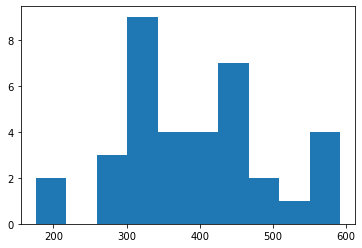

In [ ]:
plt.hist (dimensions)
plt.show()

# Categories exploration

In [ ]:
dataset_directory = '.\dataset\Hmdb51_org_extracted'

In [ ]:
completelist = [os.path.join(path, name) for path, subdirs, files in os.walk(dataset_directory) for name in files]
print("Number of files:", len(completelist))

Number of files: 6766


In [ ]:
cat_list = os.listdir(os.path.join(dataset_directory))
print("Number of categories:", len(cat_list))

Number of categories: 51


In [ ]:
file_name_list = []
cat_list_rep = []

for cat in cat_list:
    path = os.path.join(dataset_directory, cat)
    for loc, subdirs, files in os.walk(path):
        for file in files:
            file_name_list.append(file)
            cat_list_rep.append(cat)

In [ ]:
file_df = pd.DataFrame(list(zip(file_name_list, cat_list_rep)), columns = ['file_name','activity'])
file_df

,file_name,activity
0,April_09_brush_hair_u_nm_np1_ba_goo_0.avi,brush_hair
1,April_09_brush_hair_u_nm_np1_ba_goo_1.avi,brush_hair
2,April_09_brush_hair_u_nm_np1_ba_goo_2.avi,brush_hair
3,atempting_to_brush_my_hair_brush_hair_u_nm_np2...,brush_hair
4,atempting_to_brush_my_hair_brush_hair_u_nm_np2...,brush_hair
...,...,...
6761,winKen_wave_u_cm_np1_ba_bad_0.avi,wave
6762,winKen_wave_u_cm_np1_ri_bad_1.avi,wave
6763,_I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...,wave
6764,_I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...,wave


In [ ]:
def title_properties(string, category):
    match = re.findall(f'(\S+){category}(\S+)', string)[-1]
    return(match)

In [ ]:
file_df['title'] = file_df.apply(lambda file_df: title_properties(file_df['file_name'], file_df['activity'])[0], axis=1)
file_df['properties'] = file_df.apply(lambda file_df: title_properties(file_df['file_name'], file_df['activity'])[1], axis=1)
file_df

,file_name,activity,title,properties
0,April_09_brush_hair_u_nm_np1_ba_goo_0.avi,brush_hair,April_09_,_u_nm_np1_ba_goo_0.avi
1,April_09_brush_hair_u_nm_np1_ba_goo_1.avi,brush_hair,April_09_,_u_nm_np1_ba_goo_1.avi
2,April_09_brush_hair_u_nm_np1_ba_goo_2.avi,brush_hair,April_09_,_u_nm_np1_ba_goo_2.avi
3,atempting_to_brush_my_hair_brush_hair_u_nm_np2...,brush_hair,atempting_to_brush_my_hair_,_u_nm_np2_le_goo_0.avi
4,atempting_to_brush_my_hair_brush_hair_u_nm_np2...,brush_hair,atempting_to_brush_my_hair_,_u_nm_np2_le_goo_1.avi
...,...,...,...,...
6761,winKen_wave_u_cm_np1_ba_bad_0.avi,wave,winKen_,_u_cm_np1_ba_bad_0.avi
6762,winKen_wave_u_cm_np1_ri_bad_1.avi,wave,winKen_,_u_cm_np1_ri_bad_1.avi
6763,_I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...,wave,_I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...,_u_cm_np1_fr_med_0.avi
6764,_I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...,wave,_I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...,_u_cm_np1_fr_med_1.avi


In [ ]:
def separate_properties(string):
    match = re.match('_(\w+)_(\w+)_(\w+)_(\w+)_(\w+)_(\d+).avi', string)
    return(match)

In [ ]:
file_df['visible_body_parts'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[1], axis=1)
file_df['camera_motion'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[2], axis=1)
file_df['number_of_people'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[3], axis=1)
file_df['camera_viewpoint'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[4], axis=1)
file_df['video_quality'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[5], axis=1)
file_df['video_number'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[6], axis=1)

In [ ]:
file_df_complete = file_df[['title', 'video_number', 'activity', 'visible_body_parts', 'camera_motion', 'number_of_people', 'camera_viewpoint', 'video_quality']]
file_df_complete = file_df_complete.astype({'video_number': int})
file_df_complete

,title,video_number,activity,visible_body_parts,camera_motion,number_of_people,camera_viewpoint,video_quality
0,April_09_,0,brush_hair,u,nm,np1,ba,goo
1,April_09_,1,brush_hair,u,nm,np1,ba,goo
2,April_09_,2,brush_hair,u,nm,np1,ba,goo
3,atempting_to_brush_my_hair_,0,brush_hair,u,nm,np2,le,goo
4,atempting_to_brush_my_hair_,1,brush_hair,u,nm,np2,le,goo
...,...,...,...,...,...,...,...,...
6761,winKen_,0,wave,u,cm,np1,ba,bad
6762,winKen_,1,wave,u,cm,np1,ri,bad
6763,_I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...,0,wave,u,cm,np1,fr,med
6764,_I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...,1,wave,u,cm,np1,fr,med


In [ ]:
print("Number of individual videos:", len(file_df_complete.groupby('title').count()))

Number of individual videos: 1407


In [ ]:
sns.barplot(file_df_complete['camera_motion'])

# Video details exploration

In [ ]:
hmdb51_train = hub.load("hub://activeloop/hmdb51-train")
#hmdb51_test = hub.load("hub://activeloop/hmdb51-test")
hmdb51_train

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import random_split, DataLoader
from torch.optim.lr_scheduler import StepLR
import torchvision
from torchvision import get_video_backend
from torchvision.models.video import r3d_18 
from torchvision import transforms

In [ ]:
hmdb51_training = torchvision.datasets.HMDB51('video_data/', 'test_train_splits/', num_frames,
                                                step_between_clips = clip_steps, fold=1, train=True,
                                                transform=data, num_workers=num_workers)
batch_size=32
data_loader = DataLoader(hmdb51_training, batch_size=batch_size, shuffle=True, **kwargs)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import cv2

#path dove si trova il dataframe hmdb51
path = "C:/Users/Ale/Desktop/Uni/Magistrale/Secondo semestre/Deep Learning/Progetto"

##### Per ogni categoria di azioni del dataset viene estratto casualmente un video e catturato un frame

plt.figure(figsize=(30,30))
actions = os.listdir(f"{path}/hmdb51")    #va estratto il dataset dal file zippato
counter = 0
for action in actions:
    counter += 1
    list_videos_action = os.listdir(f"{path}/hmdb51/{action}")    #tutti i video di quell'azione
    if (action != "video") and (action != "rawframes"):  
        selected_video = random.choice(list_videos_action)
        video_reader = cv2.VideoCapture(f"{path}/hmdb51/{action}/{selected_video}")
        ret, gbrframe = video_reader.read()
        video_reader.release()
        rgb_frame = cv2.cvtColor(gbrframe, cv2.COLOR_BGR2RGB)    #converto immagine da BGR a RGB
        plt.subplot(9,6,counter);plt.imshow(rgb_frame, aspect = "auto");plt.axis("off")
        plt.title(action, fontsize = 20)

##### Creo dataframes contenenti le informazioni di quali video usare come training/test

def split_to_df(split):
    df = pd.DataFrame(columns=['action', 'title', 'train/test'])
    for action in actions:
        if (action != "video") and (action != "rawframes"):  
            with open(f"{path}/testTrainMulti_7030_splits/{action}_test_{split}.txt") as f:
                informations = f.readlines()       
            for info in informations:   #per ogni video della lista dei video di una data azione
                df.loc[len(df)] = action, info.split()[0], int(info.split()[1])
    return df

split1 = split_to_df("split1")
split2 = split_to_df("split2")
split3 = split_to_df("split3")

split1.head(10)

split1.to_csv("split1.csv")
split2.to_csv("split2.csv")
split3.to_csv("split3.csv")

##### Dimensioni video


dimensions = dict()
for action in actions:
    print("sono ad azione: ", action, end="\r")
    for video in os.listdir(f"{path}/hmdb51/{action}"): 
        if split1[split1["title"] == video]["train/test"].item() != 0:
            video_reader = cv2.VideoCapture(f'{path}/hmdb51/{action}/{video}')
            larghezza  = video_reader.get(cv2.CAP_PROP_FRAME_WIDTH)   # float `width`
            video_reader.release()
            if larghezza not in dimensions:
                dimensions[larghezza] = 1
            else:
                dimensions[larghezza] += 1

plt.hist (dimensions)
plt.show()

## Categories exploration

dataset_directory = '.\dataset\Hmdb51_org_extracted'

completelist = [os.path.join(path, name) for path, subdirs, files in os.walk(dataset_directory) for name in files]
print("Number of files:", len(completelist))

cat_list = os.listdir(os.path.join(dataset_directory))
print("Number of categories:", len(cat_list))

file_name_list = []
cat_list_rep = []

for cat in cat_list:
    path = os.path.join(dataset_directory, cat)
    for loc, subdirs, files in os.walk(path):
        for file in files:
            file_name_list.append(file)
            cat_list_rep.append(cat)

file_df = pd.DataFrame(list(zip(file_name_list, cat_list_rep)), columns = ['file_name','activity'])
file_df

def title_properties(string, category):
    match = re.findall(f'(\S+){category}(\S+)', string)[-1]
    return(match)

file_df['title'] = file_df.apply(lambda file_df: title_properties(file_df['file_name'], file_df['activity'])[0], axis=1)
file_df['properties'] = file_df.apply(lambda file_df: title_properties(file_df['file_name'], file_df['activity'])[1], axis=1)
file_df

def separate_properties(string):
    match = re.match('_(\w+)_(\w+)_(\w+)_(\w+)_(\w+)_(\d+).avi', string)
    return(match)

file_df['visible_body_parts'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[1], axis=1)
file_df['camera_motion'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[2], axis=1)
file_df['number_of_people'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[3], axis=1)
file_df['camera_viewpoint'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[4], axis=1)
file_df['video_quality'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[5], axis=1)
file_df['video_number'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[6], axis=1)

file_df_complete = file_df[['title', 'video_number', 'activity', 'visible_body_parts', 'camera_motion', 'number_of_people', 'camera_viewpoint', 'video_quality']]
file_df_complete = file_df_complete.astype({'video_number': int})
file_df_complete

print("Number of individual videos:", len(file_df_complete.groupby('title').count()))

sns.barplot(file_df_complete['camera_motion'])

## Video details exploration

hmdb51_train = hub.load("hub://activeloop/hmdb51-train")
#hmdb51_test = hub.load("hub://activeloop/hmdb51-test")
hmdb51_train

#!pip install torchvision

import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import random_split, DataLoader
from torch.optim.lr_scheduler import StepLR
import torchvision
from torchvision import get_video_backend
from torchvision.models.video import r3d_18 
from torchvision import transforms

hmdb51_training = torchvision.datasets.HMDB51('video_data/', 'test_train_splits/', num_frames,
                                                step_between_clips = clip_steps, fold=1, train=True,
                                                transform=data, num_workers=num_workers)
batch_size=32
data_loader = DataLoader(hmdb51_training, batch_size=batch_size, shuffle=True, **kwargs)